# Plotting $|f^{nl}_{\rm ion}(E_R,q)|^2$ as a function of both variables.
mainly to help my own intuition

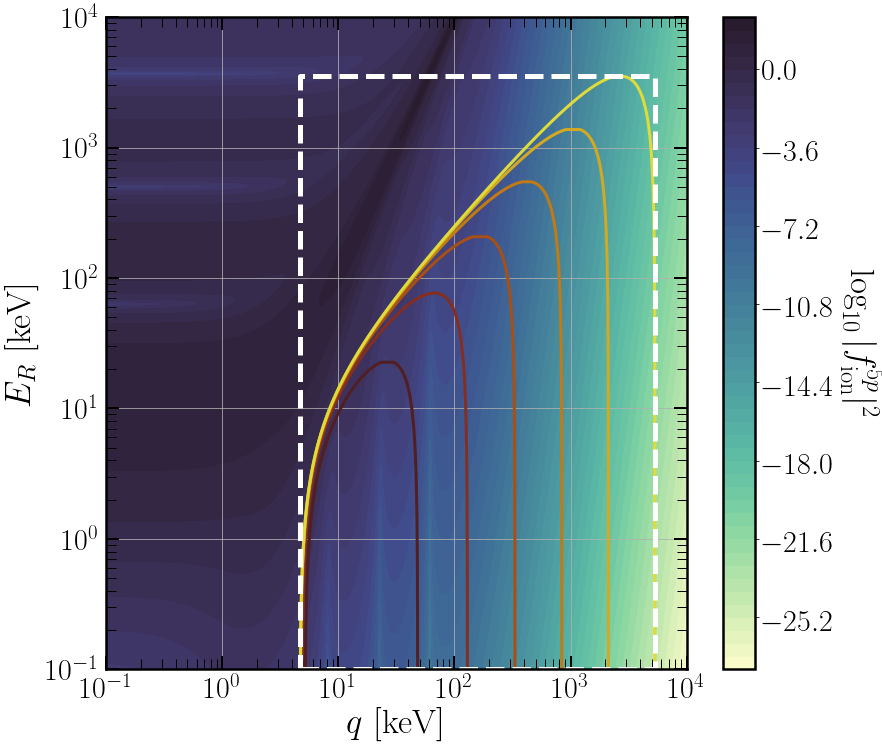

In [17]:
import sys
sys.path.append('../erec')
from numpy import *
from Params import *
from PlotFuncs import *
from AtomicFuncs import *
from HaloFuncs import *
from DMFuncs import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean

E_r_vals,q_vals,fion_fine = Xe131.IonisationFormFactor()
n = size(E_r_vals)


fig,ax1 = MySquarePlot(r'$q$ [keV]',r'$E_R$ [keV]',lfs=35,tfs=30)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid()
ax1.set_xlim([q_vals[0],q_vals[-1]])

vmax = ((800.0)*1000)/3.0e8 # natural units
qmax = zeros(shape=(n))
qmin = zeros(shape=(n))
E_B = Xe131.BindingEnergies[0]/1000.0
  
im = ax1.contourf(q_vals,1000*E_r_vals,log10(fion_fine[:,:,0]),50,cmap=cmocean.cm.deep)
cbar = plt.colorbar(im)
cbar.set_label(r'$\log_{\rm 10}|f^{5p}_{\rm ion}|^2$',fontsize=35,rotation=-90,labelpad=40)

m_vals = logspace(1.0,3.0,6)
nm = size(m_vals)
col = cmocean.cm.solar(linspace(0.1,0.9,nm))
for im in range(0,nm):
    m_DM_keV = m_vals[im]*1000.0
    for i in range(0,n): # over energies
        E_r = E_r_vals[i]
        if E_r<(0.5*m_DM_keV*vmax**2.0-E_B):
            # Form factor
            qmax[i] = m_DM_keV*vmax*(1.0+sqrt(1-2*(E_r+E_B)/(m_DM_keV*vmax**2.0)))
            qmin[i] = m_DM_keV*vmax*(1.0-sqrt(1-2*(E_r+E_B)/(m_DM_keV*vmax**2.0)))
        else:
            break
    plt.plot(append(qmin[qmin>0],flipud(qmax[qmax>0])),1000*append(E_r_vals[qmin>0],flipud(E_r_vals[qmax>0])),'-',color=col[im,:],lw=3)

    
qmax_max = amax(m_vals)*1000*vmax*(1.0+sqrt(1-2*(E_B)/(1000*amax(m_vals)*vmax**2.0)))
qmin_min = amax(m_vals)*1000*vmax*(1.0-sqrt(1-2*(E_B)/(1000*amax(m_vals)*vmax**2.0)))
Emax = min([0.5*1000*amax(m_vals)*vmax**2.0-E_B,E_r_vals[-1]])
Emin = E_r_vals[0]

plt.plot([qmin_min,qmax_max,qmax_max,qmin_min,qmin_min],array([Emin,Emin,Emax,Emax,Emin])*1000,'w--',lw=5)



plt.show()
pltname = "Xe_fion2D"
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')


